# Python California Housing Dataset Linear Regression Example

In this notebook, the example code uses the simple and multiple linear regression models from the ScikitLearn library. Additional code I would use has been provided in the examples to explain the methods behind machine learning hold-out cross-validation. The multiple linear regression example is similar to the simple linear regression example, which makes it easier for anyone to follow along and build their skills on from simple linear regression. The notebook is for educational purposes and has been designed as an introduction to the machine learning library ScikitLearn.

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn

print('ScikitLearn Version: ', sklearn.__version__)

ScikitLearn Version:  1.6.1


# Mount Google Drive to the Notebook

In [2]:
# Mounts the Google drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

# Calls the makedirs Python OS module function to create a directory for the output file
# once the Google drive is mounted to the notebook
path = '/content/drive/MyDrive/Linear_Regression/'
os.makedirs(path, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the California Housing Dataset

ScikitLearn California Housing Dataset Link:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [3]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [5]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Simple Linear Regression

# Normalise the Dataset

In [6]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Reduce the Features (X) Down to One Single Feature (Median Income)

In [7]:
X = X[:, [0]]  # Use only one feature
X

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

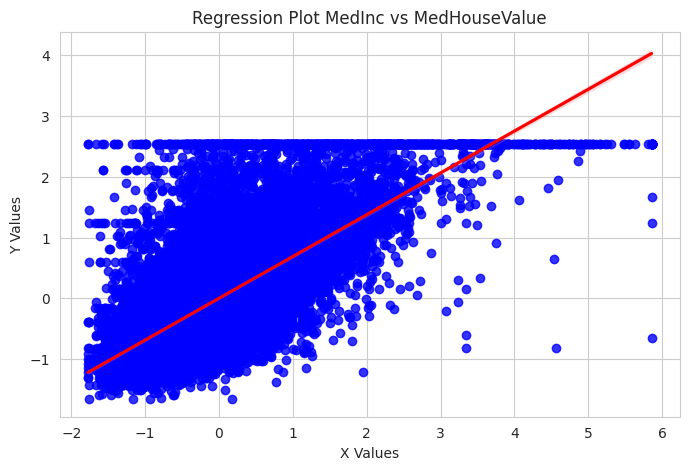

In [8]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

# Split the Training and Test Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 1)
y train shape:  (16512,)
X test shape:  (4128, 1)
y test shape:  (4128,)


In [10]:
X_train

array([[-0.32165429],
       [-0.03061993],
       [ 0.1503488 ],
       ...,
       [-0.49283239],
       [ 0.97302487],
       [-0.68174943]])

In [11]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [12]:
X_test

array([[-1.15248922],
       [-0.70501534],
       [-0.20558796],
       ...,
       [ 2.82092723],
       [-0.57147326],
       [-0.16768875]])

In [13]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Split the Training and Validation Data

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X val shape: ', X_val.shape)
print('y val shape: ', y_val.shape)

X train shape:  (13209, 1)
y train shape:  (13209,)
X val shape:  (3303, 1)
y val shape:  (3303,)


In [15]:
X_train

array([[ 0.44017249],
       [ 0.00227869],
       [-0.51999349],
       ...,
       [ 0.05986443],
       [ 0.33716033],
       [ 0.17335152]])

In [16]:
y_train

array([-0.25959862, -0.2907964 , -0.01868242, ...,  0.07317772,
       -0.58804193, -0.221468  ])

In [17]:
X_val

array([[-0.17537386],
       [-0.8938271 ],
       [ 0.1770888 ],
       ...,
       [-0.14694945],
       [-0.12931579],
       [-0.12026209]])

In [18]:
y_val

array([-0.95461586, -1.13833613,  1.94157819, ...,  0.85572207,
       -0.19373664,  0.02204802])

# Train the Simple Linear Regression Model

In [19]:
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression

LinearRegression()

# Dump the Trained Model to a Pickle File and Reload for Model Evaluation

In [20]:
file_path = '/content/drive/MyDrive/Linear_Regression/LR_model.pkl'

# Save Linear Regression weights to a pickle file
with open(file_path, "wb") as file:
    pickle.dump(linear_regression, file)
    print('Model weights file dumped to a Pickle file.')

# Read back in the model weights pickle file
with open(file_path, "rb") as file:
    loaded_model = pickle.load(file)
    print('Model weights file loaded from a Pickle file.')

Model weights file dumped to a Pickle file.
Model weights file loaded from a Pickle file.


# Training Evaluation Metrics

In [21]:
# Load the trained Linear Regression model from ScikitLearn and predict on the trianing or development dataset
y_pred_train = loaded_model.predict(X_train)

print(f"Mean squared error: {metrics.mean_squared_error(y_train, y_pred_train):.2f}")

Mean squared error: 0.52


# Validation Evaluation Metrics

The validation dataset is to display the methodology used to train machine learning models. In ScikitLearn the linear regression model automatically optimises the regression model to the best fit on the normalised dataset for us.


In [22]:
# Load the trained Linear Regression model from ScikitLearn and predict on the validation or development dataset
y_pred_val = loaded_model.predict(X_val)

print(f"Mean squared error: {metrics.mean_squared_error(y_val, y_pred_val):.2f}")

Mean squared error: 0.55


# Test Evaluation Metrics

In [23]:
# Load the trained Linear Regression model from ScikitLearn and predict on the test dataset
y_pred_test = loaded_model.predict(X_test)
y_pred_test

array([-0.79997037, -0.48967393, -0.14335084, ...,  1.95535688,
       -0.39707047, -0.11707   ])

In [24]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.flatten()
y

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

In [25]:
# Python method to calculate correlation coefficient metrics
def correlation(X, y):
    # Import Scipy libraray
    import scipy.stats

    # Calculate Pearson's Linear Correlation Coefficient with Scipy
    PLCC = scipy.stats.pearsonr(X, y)  # Pearson's r

    # Calculate Spearman Rank Correlation Coefficient (SRCC) with Scipy
    SRCC = scipy.stats.spearmanr(X, y)  # Spearman's rho

    # Calculate Kendalls Rank Correlation Coefficient (KRCC) with Scipy
    KRCC = scipy.stats.kendalltau(X, y)  # Kendall's tau

    # Prints out the correlation performance metric results to the screen
    print("PLCC: ", PLCC)
    print("SRCC: ", SRCC)
    print("KRCC: ", KRCC)

In [26]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred_test, y)

print(f"\nMean squared error: {metrics.mean_squared_error(y_test, y_pred_test):.2f}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred_test):.2f}")

PLCC:  PearsonRResult(statistic=0.6775016011370294, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.6717539981126641, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.490677943048135, pvalue=0.0)

Mean squared error: 0.53
Coefficient of determination: 0.46


# Plot the Simple Linear Regression Model Predictions

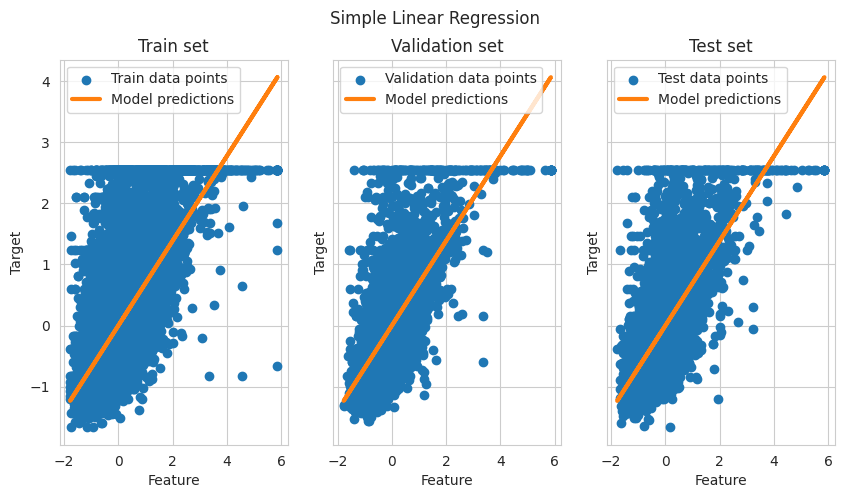

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    loaded_model.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_val, y_val, label="Validation data points")
ax[1].plot(X_val, y_pred_val, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Validation set")
ax[1].legend()

ax[2].scatter(X_test, y_test, label="Test data points")
ax[2].plot(X_test, y_pred_test, linewidth=3, color="tab:orange", label="Model predictions")
ax[2].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[2].legend()

fig.suptitle("Simple Linear Regression")

plt.show()

# Multiple Linear Regression

In [28]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [30]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Normalise the Dataset

In [31]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Split the Training and Test Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 8)
y train shape:  (16512,)
X test shape:  (4128, 8)
y test shape:  (4128,)


In [33]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [34]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [35]:
X_test

array([[-1.15248922, -0.2891866 , -0.49989596, ...,  0.07768129,
         0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 , ..., -0.03763415,
        -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 , ..., -0.164679  ,
         1.01509336, -1.43265267],
       ...,
       [ 2.82092723, -0.2891866 ,  0.73104024, ..., -0.02697551,
         0.78568194, -1.23799169],
       [-0.57147326,  0.58485227, -0.05657389, ..., -0.04641411,
         0.53286119, -0.09498235],
       [-0.16768875, -0.92485123, -0.58209158, ...,  0.06347664,
        -0.66101456,  0.59880935]])

In [36]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Split the Training and Validation Data

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X val shape: ', X_val.shape)
print('y val shape: ', y_val.shape)

X train shape:  (13209, 8)
y train shape:  (13209,)
X val shape:  (3303, 8)
y val shape:  (3303,)


In [38]:
X_train

array([[ 0.44017249, -0.13027044,  0.44228214, ...,  0.03014364,
         1.10873067, -0.69893052],
       [ 0.00227869, -1.08376738, -0.14978864, ..., -0.04039273,
        -0.71719695,  0.8483747 ],
       [-0.51999349, -0.20972852, -0.05593192, ..., -0.01517569,
        -0.87638038,  0.85835732],
       ...,
       [ 0.05986443, -0.84539315,  0.04883938, ...,  0.01654854,
        -1.35393068,  1.28760974],
       [ 0.33716033, -1.00430931, -0.41013242, ..., -0.09483536,
        -0.83892546,  0.8483747 ],
       [ 0.17335152,  0.50539419, -0.42718608, ..., -0.00904225,
        -0.8061524 ,  0.62376588]])

In [39]:
y_train

array([-0.25959862, -0.2907964 , -0.01868242, ...,  0.07317772,
       -0.58804193, -0.221468  ])

In [40]:
X_val

array([[-0.17537386,  0.50539419,  0.45064886, ..., -0.01156442,
         0.51881559, -0.13990412],
       [-0.8938271 , -0.44810276, -0.46150688, ..., -0.03396046,
         2.52265411, -2.29115751],
       [ 0.1770888 , -1.16322546, -0.6111567 , ..., -0.10490623,
        -0.91851717,  0.82341817],
       ...,
       [-0.14694945, -0.60701891, -0.34278419, ..., -0.01139758,
        -1.01215449,  0.93322693],
       [-0.12931579, -0.2891866 , -0.04036317, ..., -0.09442963,
        -1.32583949,  1.24268797],
       [-0.12026209, -0.76593507, -0.43845886, ..., -0.04099133,
        -0.84828919,  0.80345294]])

In [41]:
y_val

array([-0.95461586, -1.13833613,  1.94157819, ...,  0.85572207,
       -0.19373664,  0.02204802])

# Train the Multiple Linear Regression Model

In [42]:
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression

LinearRegression()

# Dump the Trained Model to a Pickle File and Reload for Model Evaluation

In [43]:
file_path = '/content/drive/MyDrive/Linear_Regression/LR_multiple_model.pkl'

# Save Linear Regression weights to a pickle file
with open(file_path, "wb") as file:
    pickle.dump(linear_regression, file)
    print('Model weights file dumped to a Pickle file.')

# Read back in the model weights pickle file
with open(file_path, "rb") as file:
    loaded_model = pickle.load(file)
    print('Model weights file loaded from a Pickle file.')

Model weights file dumped to a Pickle file.
Model weights file loaded from a Pickle file.


# Training Evaluation Metrics

In [44]:
# Load the trained Linear Regression model from ScikitLearn and predict on the trianing or development dataset
y_pred_train = loaded_model.predict(X_train)

print(f"Mean squared error: {metrics.mean_squared_error(y_train, y_pred_train):.2f}")

Mean squared error: 0.39


# Validation Evaluation Metrics

The validation dataset is to display the methodology used to train machine learning models. In ScikitLearn the linear regression model automatically optimises the regression model to the best fit on the normalised dataset for us.


In [45]:
# Load the trained Linear Regression model from ScikitLearn and predict on the validation or development dataset
y_pred_val = loaded_model.predict(X_val)

print(f"Mean squared error: {metrics.mean_squared_error(y_val, y_pred_val):.2f}")

Mean squared error: 0.40


# Test Evaluation Metrics

In [46]:
# Load the trained Linear Regression model from ScikitLearn and predict on the test dataset
y_pred_test = loaded_model.predict(X_test)
y_pred_test

array([-1.16756835, -0.26681142,  0.5525369 , ...,  2.08616549,
       -0.76198854, -0.04681799])

In [47]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.flatten()
y

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

In [48]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred_test, y)

print(f"\nMean squared error: {metrics.mean_squared_error(y_test, y_pred_test):.2f}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred_test):.2f}")

PLCC:  PearsonRResult(statistic=0.7606182234695205, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.8062287389627869, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.6174703618779245, pvalue=0.0)

Mean squared error: 0.42
Coefficient of determination: 0.58


# Plot the Model Predictions

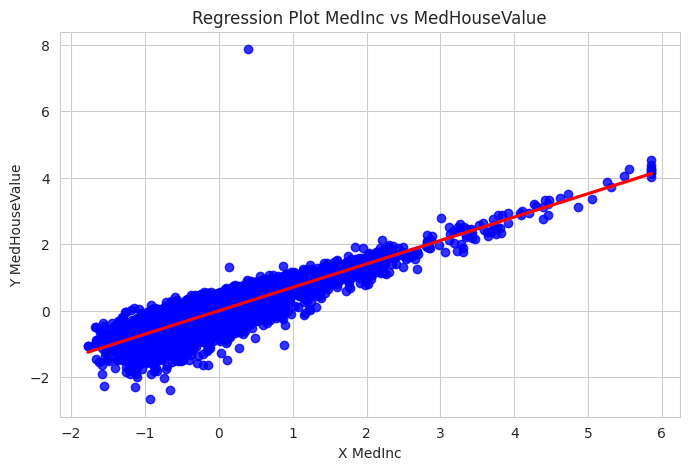

In [49]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [0]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X MedInc")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

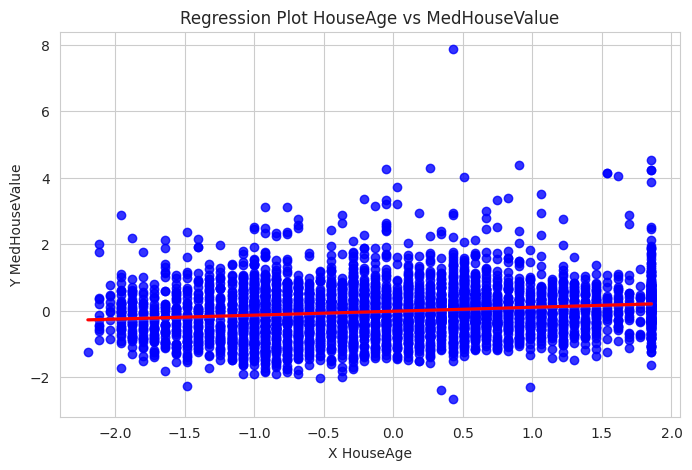

In [50]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [1]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X HouseAge")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot HouseAge vs MedHouseValue")

# Show the plot
plt.show()

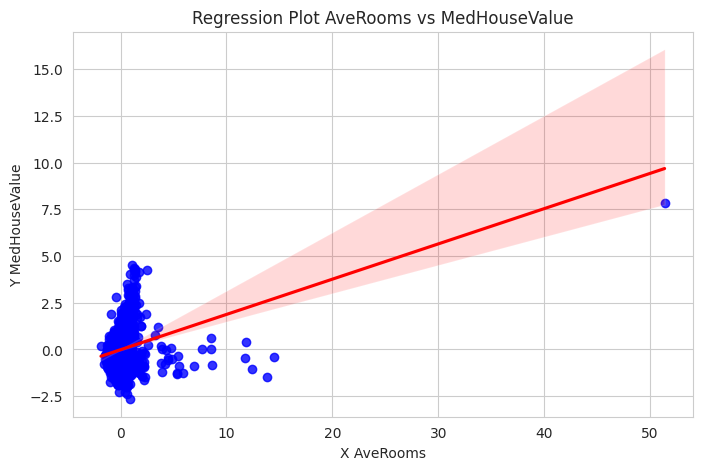

In [51]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [2]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveRooms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveRooms vs MedHouseValue")

# Show the plot
plt.show()

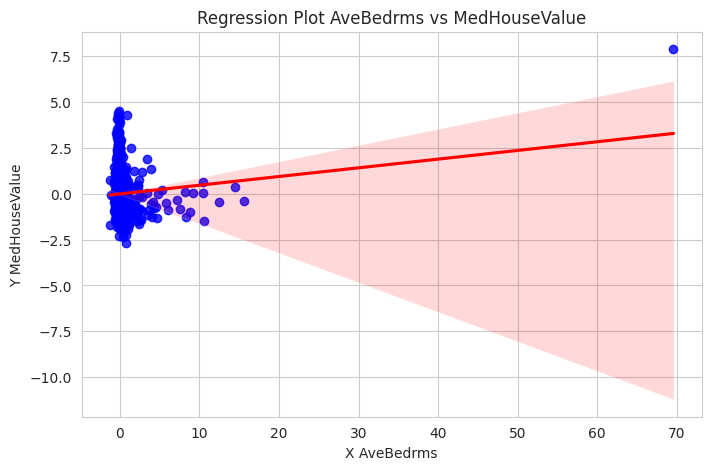

In [52]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [3]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveBedrms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveBedrms vs MedHouseValue")

# Show the plot
plt.show()

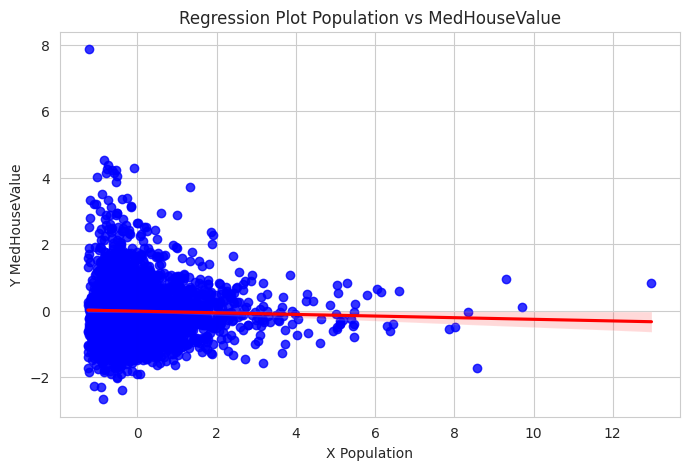

In [53]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [4]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Population")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Population vs MedHouseValue")

# Show the plot
plt.show()

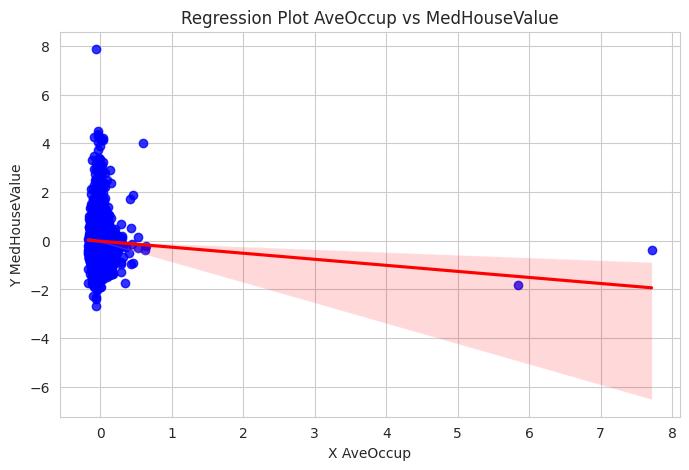

In [54]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [5]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveOccup")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveOccup vs MedHouseValue")

# Show the plot
plt.show()

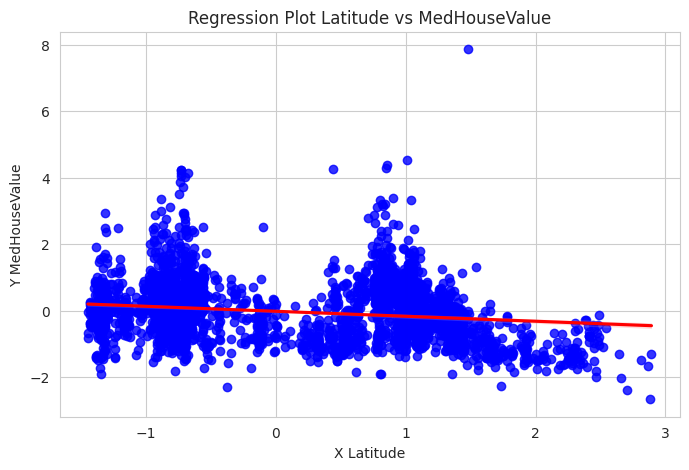

In [55]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [6]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Latitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Latitude vs MedHouseValue")

# Show the plot
plt.show()

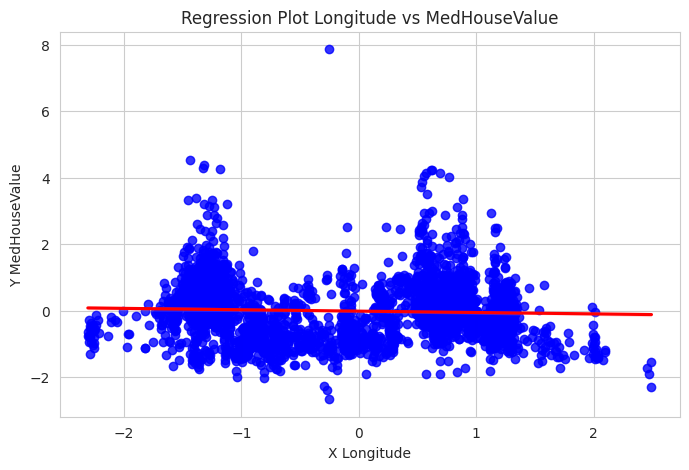

In [56]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [7]], y=y_pred_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Longitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Longitude vs MedHouseValue")

# Show the plot
plt.show()

In [57]:
%whos

Variable            Type                Data/Info
-------------------------------------------------
LinearRegression    ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
StandardScaler      type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                   ndarray             20640x8: 165120 elems, type `float64`, 1320960 bytes (1.259765625 Mb)
X_test              ndarray             4128x8: 33024 elems, type `float64`, 264192 bytes (258.0 kb)
X_train             ndarray             13209x8: 105672 elems, type `float64`, 845376 bytes (825.5625 kb)
X_val               ndarray             3303x8: 26424 elems, type `float64`, 211392 bytes (206.4375 kb)
ax                  ndarray             3: 3 elems, type `object`, 24 bytes
correlation         function            <function correlation at 0x7edaea350860>
drive               module              <module 'google.colab.dri<...>s/google/colab/drive.py'>
fig                 Figure        